In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import xlsxwriter
import pandas as pd
import os,sys
import seaborn as sns

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
cwd = os.getcwd()

In [4]:
df = pd.read_csv(cwd+'/IrCNNN_smiles_dative.csv')
df.drop(columns=['max_lambda','CN_smiles','NN_smiles','complex_smiles'], axis=1, inplace=True)
df

,complex_i,C^N,N^N,Emax
0,0,1,1,48.74
1,1,2,1,48.20
2,2,3,1,50.86
3,3,4,1,51.23
4,4,5,1,51.13
...,...,...,...,...
1435,1435,105,47,56.65
1436,1436,106,47,54.70
1437,1437,107,47,51.78
1438,1438,108,47,50.86


In [5]:
def complex_name(num):
    name = 'IrCNNN'+str(num)+'_s.xyz'
    return name

In [6]:
df['filename'] = df['complex_i'].apply(complex_name)
df

,complex_i,C^N,N^N,Emax,filename
0,0,1,1,48.74,IrCNNN0_s.xyz
1,1,2,1,48.20,IrCNNN1_s.xyz
2,2,3,1,50.86,IrCNNN2_s.xyz
3,3,4,1,51.23,IrCNNN3_s.xyz
4,4,5,1,51.13,IrCNNN4_s.xyz
...,...,...,...,...,...
1435,1435,105,47,56.65,IrCNNN1435_s.xyz
1436,1436,106,47,54.70,IrCNNN1436_s.xyz
1437,1437,107,47,51.78,IrCNNN1437_s.xyz
1438,1438,108,47,50.86,IrCNNN1438_s.xyz


In [7]:
df_cn = pd.read_csv(cwd+'/CN_smiles.csv')
df_cn.drop(columns=['CN_smiles','HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_cn

,C^N,CN_smiles_clean,CN_HOMO,CN_LUMO
0,1,C1(C2=NC=CC=C2)=CC=CC=C1,-152.27,-37.02
1,2,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45
2,3,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54
3,4,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64
4,5,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00
5,7,CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2,-155.15,-51.41
6,9,CC(C=C1)=CN=C1C2=CC=C(OC)C=C2,-137.94,-32.17
7,11,CC(C=C1)=CN=C1C2=CC=C(F)C=C2F,-150.80,-37.62
8,12,CC(C=C1)=CN=C1C2=CC=C(F)C=C2Cl,-153.90,-35.19
9,13,CC(C=C1)=CN=C1C2=CC=C(F)C=C2Br,-153.68,-35.02


In [8]:
df_nn = pd.read_csv(cwd+'/NN_smiles.csv')
df_nn.drop(columns=['NN_smiles','HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_nn

,N^N,NN_smiles_clean,NN_HOMO,NN_LUMO
0,1,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
1,2,CC1=CC(C2=NC=CC(C)=C2)=NC=C1,-153.90,-41.21
2,3,CC1=CN=C(C2=NC=C(C)C=C2)C=C1,-148.56,-39.76
3,4,CC1=CC=CC(C2=NC(C)=CC=C2)=N1,-150.25,-41.26
4,5,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...,-155.88,-46.17
5,6,CC(C)(C)C1=CC(C2=NC=CC(C(C)(C)C)=C2)=NC=C1,-152.69,-40.61
6,7,FC(C1=CN=C(C2=NC=C(C(F)(F)F)C=C2)C=C1)(F)F,-169.38,-59.00
7,8,COC1=CC(C2=NC=CC(OC)=C2)=NC=C1,-159.88,-35.25
8,14,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88
9,16,C12=NC=CC=C1C=CC3=CC=CN=C23,-153.03,-44.09


In [9]:
df_st = pd.read_csv(cwd+'/st_eng_IrCNNN.csv')
df_st.drop(columns=['singlet(H)','triplet(H)'],axis=1,inplace=True)
df_st

,complex_i,E_T
0,1,49.55
1,2,52.96
2,3,52.72
3,4,53.09
4,5,54.75
...,...,...
748,1234,44.67
749,1235,26.22
750,1237,25.67
751,1238,30.12


In [10]:
df_hl = pd.read_csv(cwd+'/homo_lumo_IrCNNN.csv')
#df_hl.drop(columns=['HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_hl

,complex_i,HOMO,LUMO,HL_gap
0,1,-136.06,-62.58,73.49
1,2,-136.11,-62.70,73.41
2,3,-139.87,-63.78,76.09
3,4,-142.56,-63.65,78.91
4,5,-146.64,-64.65,81.99
...,...,...,...,...
872,1234,-148.16,-62.07,86.08
873,1235,-145.84,-77.50,68.34
874,1237,-144.16,-76.17,67.98
875,1238,-141.20,-77.57,63.63


In [11]:
result1 = pd.merge(df, df_cn, how="left", on="C^N")
result = pd.merge(result1, df_nn, how="left", on="N^N")
result

,complex_i,C^N,N^N,Emax,filename,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO
0,0,1,1,48.74,IrCNNN0_s.xyz,C1(C2=NC=CC=C2)=CC=CC=C1,-152.27,-37.02,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
1,1,2,1,48.20,IrCNNN1_s.xyz,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
2,2,3,1,50.86,IrCNNN2_s.xyz,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
3,3,4,1,51.23,IrCNNN3_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
4,4,5,1,51.13,IrCNNN4_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39
...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,105,47,56.65,IrCNNN1435_s.xyz,CN1N=NC(C2=CC=C(C(F)(F)F)C=C2)=C1,-154.83,-38.18,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18
1436,1436,106,47,54.70,IrCNNN1436_s.xyz,FC1=CC=C(C2=CN(C)N=N2)C=C1,-147.04,-26.20,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18
1437,1437,107,47,51.78,IrCNNN1437_s.xyz,CN1N=NC(C2=CC=CC=C2)=C1,-147.52,-26.52,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18
1438,1438,108,47,50.86,IrCNNN1438_s.xyz,COC1=CC=C(N2C=CC=N2)C=C1,-140.15,-21.90,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18


In [12]:
result['CN_gap'] = result['CN_LUMO'] - result['CN_HOMO']
result['NN_gap'] = result['NN_LUMO'] - result['NN_HOMO']
result['LL_gap'] = result['NN_LUMO'] - result['CN_HOMO']
result

,complex_i,C^N,N^N,Emax,filename,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap
0,0,1,1,48.74,IrCNNN0_s.xyz,C1(C2=NC=CC=C2)=CC=CC=C1,-152.27,-37.02,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,115.25,119.25,111.88
1,1,2,1,48.20,IrCNNN1_s.xyz,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,113.19,119.25,108.25
2,2,3,1,50.86,IrCNNN2_s.xyz,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,112.55,119.25,107.70
3,3,4,1,51.23,IrCNNN3_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,110.07,119.25,108.32
4,4,5,1,51.13,IrCNNN4_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,109.30,119.25,107.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,105,47,56.65,IrCNNN1435_s.xyz,CN1N=NC(C2=CC=C(C(F)(F)F)C=C2)=C1,-154.83,-38.18,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,116.65,109.45,113.65
1436,1436,106,47,54.70,IrCNNN1436_s.xyz,FC1=CC=C(C2=CN(C)N=N2)C=C1,-147.04,-26.20,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,120.84,109.45,105.86
1437,1437,107,47,51.78,IrCNNN1437_s.xyz,CN1N=NC(C2=CC=CC=C2)=C1,-147.52,-26.52,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,121.00,109.45,106.34
1438,1438,108,47,50.86,IrCNNN1438_s.xyz,COC1=CC=C(N2C=CC=N2)C=C1,-140.15,-21.90,CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1,-150.63,-41.18,118.25,109.45,98.97


In [13]:
df_sub = pd.merge(df_st, df_hl, how="inner", on="complex_i")
df_sum = pd.merge(result, df_sub, how="inner", on="complex_i")
df_sum

,complex_i,C^N,N^N,Emax,filename,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap,E_T,HOMO,LUMO,HL_gap
0,1,2,1,48.20,IrCNNN1_s.xyz,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,113.19,119.25,108.25,49.55,-136.06,-62.58,73.49
1,2,3,1,50.86,IrCNNN2_s.xyz,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,112.55,119.25,107.70,52.96,-136.11,-62.70,73.41
2,3,4,1,51.23,IrCNNN3_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,110.07,119.25,108.32,52.72,-139.87,-63.78,76.09
3,4,5,1,51.13,IrCNNN4_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,109.30,119.25,107.91,53.09,-142.56,-63.65,78.91
4,5,7,1,50.64,IrCNNN5_s.xyz,CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2,-155.15,-51.41,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,103.74,119.25,114.76,54.75,-146.64,-64.65,81.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1234,67,42,52.88,IrCNNN1234_s.xyz,FC1=CC=C(C2=NC=C(C)C=C2)C=C1C(F)(F)F,-153.16,-41.10,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,112.06,103.48,101.59,44.67,-148.16,-62.07,86.08
748,1235,68,42,49.63,IrCNNN1235_s.xyz,CC(C=C1)=CN=C1C2=CC=CC(Cl)=C2,-151.79,-39.21,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,112.58,103.48,100.22,26.22,-145.84,-77.50,68.34
749,1237,70,42,48.33,IrCNNN1237_s.xyz,CCC(C=C1)=CN=C1C2=CC=CC=C2,-148.54,-35.23,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,113.31,103.48,96.97,25.67,-144.16,-76.17,67.98
750,1238,71,42,48.57,IrCNNN1238_s.xyz,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=CC=CC=C1,-152.33,-41.28,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,111.05,103.48,100.76,30.12,-141.20,-77.57,63.63


In [14]:
df_sum['DFT_error'] = df_sum['E_T'] - df_sum['Emax']

In [15]:
df_test = df_sum[['complex_i','filename','CN_gap','NN_gap','LL_gap','HL_gap','Emax','E_T','DFT_error']]
df_test

,complex_i,filename,CN_gap,NN_gap,LL_gap,HL_gap,Emax,E_T,DFT_error
0,1,IrCNNN1_s.xyz,113.19,119.25,108.25,73.49,48.20,49.55,1.35
1,2,IrCNNN2_s.xyz,112.55,119.25,107.70,73.41,50.86,52.96,2.10
2,3,IrCNNN3_s.xyz,110.07,119.25,108.32,76.09,51.23,52.72,1.49
3,4,IrCNNN4_s.xyz,109.30,119.25,107.91,78.91,51.13,53.09,1.96
4,5,IrCNNN5_s.xyz,103.74,119.25,114.76,81.99,50.64,54.75,4.11
...,...,...,...,...,...,...,...,...,...
747,1234,IrCNNN1234_s.xyz,112.06,103.48,101.59,86.08,52.88,44.67,-8.21
748,1235,IrCNNN1235_s.xyz,112.58,103.48,100.22,68.34,49.63,26.22,-23.41
749,1237,IrCNNN1237_s.xyz,113.31,103.48,96.97,67.98,48.33,25.67,-22.66
750,1238,IrCNNN1238_s.xyz,111.05,103.48,100.76,63.63,48.57,30.12,-18.45


In [16]:
df_test.describe()

,complex_i,CN_gap,NN_gap,LL_gap,HL_gap,Emax,E_T,DFT_error
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,550.625000,110.033258,108.201117,102.031316,74.009229,52.225266,50.120638,-2.104628
std,375.106348,6.806477,9.392541,13.443094,9.825928,3.552121,10.115929,10.016403
min,1.000000,93.810000,81.690000,50.060000,33.670000,37.820000,16.260000,-44.600000
25%,227.750000,104.680000,105.450000,99.257500,72.602500,49.970000,48.340000,-3.845000
50%,493.500000,110.160000,108.990000,105.840000,76.670000,52.325000,53.125000,1.295000
75%,881.250000,113.500000,112.080000,109.540000,79.640000,54.505000,55.590000,3.192500
max,1239.000000,129.670000,124.630000,124.670000,87.530000,71.520000,76.200000,27.710000


In [17]:
df_test.corr()

,complex_i,CN_gap,NN_gap,LL_gap,HL_gap,Emax,E_T,DFT_error
complex_i,1.000000,-0.011650,-0.216142,-0.160836,-0.035486,0.213413,-0.266907,-0.345242
CN_gap,-0.011650,1.000000,0.015576,0.115082,0.020412,-0.050271,0.031824,0.049968
NN_gap,-0.216142,0.015576,1.000000,0.843277,0.752250,0.130260,0.566490,0.525925
LL_gap,-0.160836,0.115082,0.843277,1.000000,0.911365,0.236005,0.711698,0.635075
HL_gap,-0.035486,0.020412,0.752250,0.911365,1.000000,0.321149,0.762096,0.655780
Emax,0.213413,-0.050271,0.130260,0.236005,0.321149,1.000000,0.203452,-0.149157
E_T,-0.266907,0.031824,0.566490,0.711698,0.762096,0.203452,1.000000,0.937786
DFT_error,-0.345242,0.049968,0.525925,0.635075,0.655780,-0.149157,0.937786,1.000000


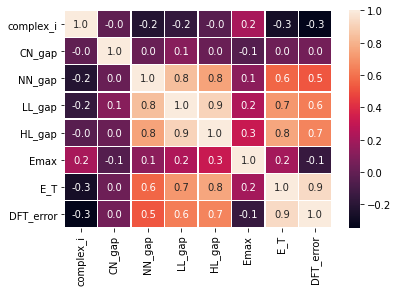

In [18]:
#correlation map
f,ax = plt.subplots()
sns.heatmap(df_test.corr(), annot=True, linewidths=.5,fmt= '.1f',ax=ax) 
plt.show()

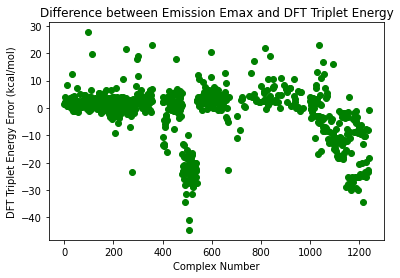

In [19]:
plt.plot(df_test['complex_i'], df_test['DFT_error'], 'o', color='g')
plt.title('Difference between Emission Emax and DFT Triplet Energy')
plt.xlabel('Complex Number')
plt.ylabel('DFT Triplet Energy Error (kcal/mol)')
plt.show()

In [19]:
df_sum.loc[df_sum['DFT_error']>15]

,complex_i,C^N,N^N,Emax,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap,E_T,HOMO,LUMO,HL_gap,DFT_error
73,96,69,2,48.49,C1(CC2=NC=CC=C2)=CC=CC=C1,-157.04,-27.37,CC1=CC(C2=NC=CC(C)=C2)=NC=C1,-153.90,-41.21,129.67,112.69,115.83,76.20,-134.65,-60.70,73.95,27.71
88,112,102,2,53.18,FC1=CC=C(N2C=CC=N2)C=C1,-148.21,-29.01,CC1=CC(C2=NC=CC(C)=C2)=NC=C1,-153.90,-41.21,119.20,112.69,107.00,73.08,-143.32,-61.99,81.33,19.90
209,252,28,5,47.92,C12=CC=CC=C1C=CC3=CC=CN=C23,-145.83,-41.47,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...,-155.88,-46.17,104.36,109.71,99.66,69.60,-132.34,-63.87,68.46,21.68
248,296,106,5,51.55,FC1=CC=C(C2=CN(C)N=N2)C=C1,-147.04,-26.20,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...,-155.88,-46.17,120.84,109.71,100.87,69.60,-136.70,-62.82,73.88,18.05
251,299,109,5,47.92,CN1N=NC(C2=CC=C(C(C)(C)C)C=C2)=C1,-143.24,-23.93,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...,-155.88,-46.17,119.31,109.71,97.07,67.10,-131.14,-61.57,69.57,19.18
294,357,107,6,50.73,CN1N=NC(C2=CC=CC=C2)=C1,-147.52,-26.52,CC(C)(C)C1=CC(C2=NC=CC(C(C)(C)C)=C2)=NC=C1,-152.69,-40.61,121.00,112.08,106.91,73.87,-135.89,-57.32,78.58,23.14
339,456,69,8,49.03,C1(CC2=NC=CC=C2)=CC=CC=C1,-157.04,-27.37,COC1=CC(C2=NC=CC(OC)=C2)=NC=C1,-159.88,-35.25,129.67,124.63,121.79,66.93,-127.85,-57.08,70.77,17.90
472,597,107,16,49.71,CN1N=NC(C2=CC=CC=C2)=C1,-147.52,-26.52,C12=NC=CC=C1C=CC3=CC=CN=C23,-153.03,-44.09,121.00,108.94,103.43,70.24,-133.47,-59.73,73.73,20.53
529,772,102,24,51.64,FC1=CC=C(N2C=CC=N2)C=C1,-148.21,-29.01,C12=NC=CC(C3=CC=CC=C3)=C1C=CC4=C(C5=CC=CC=C5)C...,-148.05,-46.20,119.20,101.85,102.01,68.97,-141.65,-63.98,77.67,17.33
540,816,69,26,45.78,C1(CC2=NC=CC=C2)=CC=CC=C1,-157.04,-27.37,CC1=CC2=CC=CN=C2C3=NC=CC=C31,-149.77,-43.79,129.67,105.98,113.25,67.89,-134.86,-62.72,72.14,22.11


In [20]:
df_sum.loc[df_sum['DFT_error']<-15]

,complex_i,C^N,N^N,Emax,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap,E_T,HOMO,LUMO,HL_gap,DFT_error
229,276,69,5,48.45,C1(CC2=NC=CC=C2)=CC=CC=C1,-157.04,-27.37,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...,-155.88,-46.17,129.67,109.71,110.87,25.19,-133.96,-67.16,66.80,-23.26
311,419,109,7,54.44,CN1N=NC(C2=CC=C(C(C)(C)C)C=C2)=C1,-143.24,-23.93,FC(C1=CN=C(C2=NC=C(C(F)(F)F)C=C2)C=C1)(F)F,-169.38,-59.00,119.31,110.38,84.24,38.40,-139.46,-74.59,64.87,-16.04
362,480,1,14,41.86,C1(C2=NC=CC=C2)=CC=CC=C1,-152.27,-37.02,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,115.25,81.69,64.39,24.98,-140.24,-97.43,42.81,-16.88
363,481,2,14,48.37,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,113.19,81.69,60.76,24.14,-142.23,-96.99,45.24,-24.23
364,482,3,14,48.25,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,112.55,81.69,60.21,27.04,-141.44,-97.87,43.57,-21.21
365,483,4,14,48.37,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,110.07,81.69,60.83,25.33,-139.25,-97.77,41.48,-23.04
366,484,5,14,48.99,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,109.30,81.69,60.42,25.50,-139.37,-97.82,41.55,-23.49
368,486,9,14,47.09,CC(C=C1)=CN=C1C2=CC=C(OC)C=C2,-137.94,-32.17,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,105.77,81.69,50.06,20.98,-134.23,-97.24,36.99,-26.11
369,487,11,14,51.41,CC(C=C1)=CN=C1C2=CC=C(F)C=C2F,-150.80,-37.62,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,113.18,81.69,62.92,30.57,-145.42,-98.41,47.01,-20.84
371,489,13,14,48.33,CC(C=C1)=CN=C1C2=CC=C(F)C=C2Br,-153.68,-35.02,O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O,-169.57,-87.88,118.66,81.69,65.80,30.44,-145.68,-98.62,47.06,-17.89


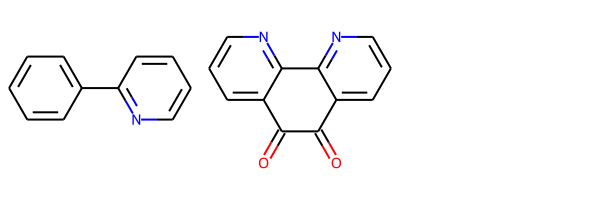

In [21]:
cn_smiles = df_sum['CN_smiles_clean'][362]
nn_smiles = df_sum['NN_smiles_clean'][362]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

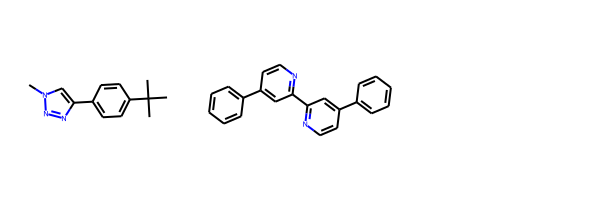

In [26]:
cn_smiles = df_sum['CN_smiles_clean'][251]
nn_smiles = df_sum['NN_smiles_clean'][251]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

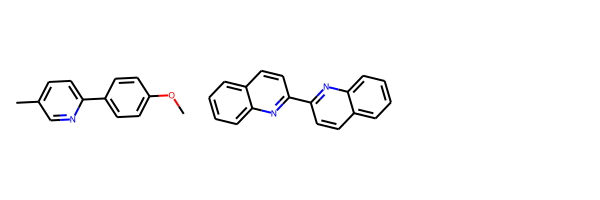

In [25]:
cn_smiles = df_sum['CN_smiles_clean'][515]
nn_smiles = df_sum['NN_smiles_clean'][515]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

Text(0, 0.5, 'DFT Triplet Energy')

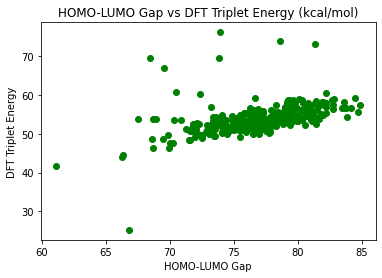

In [30]:
plt.plot(df_sum['HL_gap'], df_sum['E_T'], 'o', color='g')
plt.title('HOMO-LUMO Gap vs DFT Triplet Energy (kcal/mol)')
plt.xlabel('HOMO-LUMO Gap')
plt.ylabel('DFT Triplet Energy')

Text(0, 0.5, 'Emission Emax')

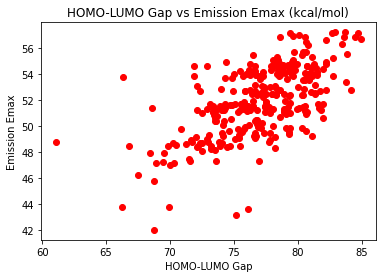

In [31]:
plt.plot(df_sum['HL_gap'], df_sum['Emax'], 'o', color='r')
plt.title('HOMO-LUMO Gap vs Emission Emax (kcal/mol)')
plt.xlabel('HOMO-LUMO Gap')
plt.ylabel('Emission Emax')

Text(0, 0.5, 'Emission Emax')

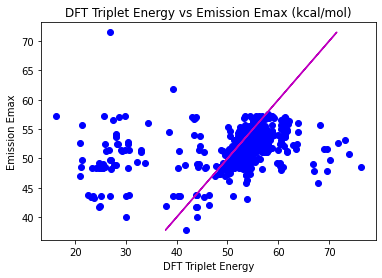

In [18]:
plt.plot(df_sum['E_T'], df_sum['Emax'], 'o', color='b')
plt.plot(df_sum['Emax'], df_sum['Emax'], '-', color='m')
plt.title('DFT Triplet Energy vs Emission Emax (kcal/mol)')
plt.xlabel('DFT Triplet Energy')
plt.ylabel('Emission Emax')

In [34]:
pip install dscribe

  Using cached dscribe-1.0.0.tar.gz (147 kB)
  Using cached ase-3.21.1-py3-none-any.whl (2.2 MB)
  Using cached pybind11-2.6.2-py2.py3-none-any.whl (191 kB)
  Using cached sparse-0.12.0-py2.py3-none-any.whl (76 kB)
     |████████████████████████████████| 2.2 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 7.7 MB/s eta 0:00:01
Failed to build dscribe
    Running setup.py install for dscribe ... done
  DEPRECATION: dscribe was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. pip 21.0 will remove support for this functionality. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
Note: you may need to restart the kernel to use updated packages.


In [39]:
from ase.io import read,write
import dscribe
from dscribe.descriptors import CoulombMatrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [40]:
y = df_sum['DFT_error']
df_train, df_test, y_train, y_test = train_test_split(df_sum, y, test_size=0.2, random_state=42)
df_train['filename']

585    IrCNNN1000_s.xyz
131     IrCNNN162_s.xyz
44       IrCNNN57_s.xyz
70       IrCNNN93_s.xyz
495     IrCNNN632_s.xyz
             ...       
71       IrCNNN94_s.xyz
106     IrCNNN131_s.xyz
270     IrCNNN329_s.xyz
435     IrCNNN558_s.xyz
102     IrCNNN127_s.xyz
Name: filename, Length: 601, dtype: object

In [ ]:
#X = df_sum[['CN_gap','NN_gap','LL_gap','HL_gap','E_T','Emax','sorted_CM']]
X = coulomb_matrices
y = df_sum['DFT_error']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

In [25]:
geomfile = 'IrCNNN1_s.xyz'
geom = read('opt_complex_xyz/'+geomfile)
totnum = len(geom)
cm_desc = CoulombMatrix(n_atoms_max=totnum,permutation="eigenspectrum")
coulomb_matrices = cm_desc.create(geom)
print(coulomb_matrices.shape)

(67,)


In [41]:
samples = []
maxtot = 0
for geomfile in df_train['filename']:
    geom = read('opt_complex_xyz/'+geomfile)
    samples.append(geom)
    totnum = len(geom)
    if totnum > maxtot:
        maxtot = totnum
    
print(maxtot)
cm_desc = CoulombMatrix(n_atoms_max=maxtot,permutation="eigenspectrum")
coulomb_matrices = cm_desc.create(samples)
print(coulomb_matrices.shape)

111


In [28]:
coulomb_matrices

array([[16900.0433929 ,   332.61057365,   122.20880874, ...,
            0.        ,     0.        ,     0.        ],
       [16902.04222889,   357.33030934,   133.0047636 , ...,
            0.        ,     0.        ,     0.        ],
       [16906.61040544,   569.13980407,   416.4334056 , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [16902.91144093,   363.88764122,   137.95850429, ...,
            0.        ,     0.        ,     0.        ],
       [16902.89265773,   384.3678935 ,   148.34493544, ...,
            0.        ,     0.        ,     0.        ],
       [16900.16485176,   395.45645134,   165.3974643 , ...,
            0.        ,     0.        ,     0.        ]])

In [38]:
def create_CM(geomfile):    
    geom = read('opt_complex_xyz/'+geomfile)
    totnum = len(geom)
    cm_desc = CoulombMatrix(n_atoms_max=totnum,permutation="sorted_l2")
    coulomb_matrices = cm_desc.create(geom)
    return coulomb_matrices

In [39]:
df_sum['sorted_CM'] = df_sum['filename'].apply(create_CM)
df_sum

,complex_i,C^N,N^N,Emax,filename,CN_smiles_clean,CN_HOMO,CN_LUMO,NN_smiles_clean,NN_HOMO,NN_LUMO,CN_gap,NN_gap,LL_gap,E_T,HOMO,LUMO,HL_gap,DFT_error,sorted_CM
0,1,2,1,48.20,IrCNNN1_s.xyz,CC(C=C1)=CN=C1C2=CC=CC=C2,-148.64,-35.45,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,113.19,119.25,108.25,49.55,-136.06,-62.58,73.49,1.35,"[16847.976370951626, 262.1612562649149, 261.96..."
1,2,3,1,50.86,IrCNNN2_s.xyz,CC(C=C1)=CN=C1C2=CC=C(F)C=C2,-148.09,-35.54,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,112.55,119.25,107.70,52.96,-136.11,-62.70,73.41,2.10,"[16847.976370951626, 261.4773609633968, 261.47..."
2,3,4,1,51.23,IrCNNN3_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2,-148.71,-38.64,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,110.07,119.25,108.32,52.72,-139.87,-63.78,76.09,1.49,"[16847.976370951626, 225.68747540342707, 225.6..."
3,4,5,1,51.13,IrCNNN4_s.xyz,CC(C=C1)=CN=C1C2=CC=C(Br)C=C2,-148.30,-39.00,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,109.30,119.25,107.91,53.09,-142.56,-63.65,78.91,1.96,"[16847.976370951626, 447.9526456794899, 447.95..."
4,5,7,1,50.64,IrCNNN5_s.xyz,CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2,-155.15,-51.41,C1(C2=NC=CC=C2)=NC=CC=C1,-159.64,-40.39,103.74,119.25,114.76,54.75,-146.64,-64.65,81.99,4.11,"[16847.976370951626, 264.36678857899363, 264.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1234,67,42,52.88,IrCNNN1234_s.xyz,FC1=CC=C(C2=NC=C(C)C=C2)C=C1C(F)(F)F,-153.16,-41.10,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,112.06,103.48,101.59,44.67,-148.16,-62.07,86.08,-8.21,"[16847.976370951626, 262.5399369153595, 255.08..."
748,1235,68,42,49.63,IrCNNN1235_s.xyz,CC(C=C1)=CN=C1C2=CC=CC(Cl)=C2,-151.79,-39.21,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,112.58,103.48,100.22,26.22,-145.84,-77.50,68.34,-23.41,"[16847.976370951626, 196.34542945601322, 196.1..."
749,1237,70,42,48.33,IrCNNN1237_s.xyz,CCC(C=C1)=CN=C1C2=CC=CC=C2,-148.54,-35.23,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,113.31,103.48,96.97,25.67,-144.16,-76.17,67.98,-22.66,"[16847.976370951626, 266.30324163437484, 261.4..."
750,1238,71,42,48.57,IrCNNN1238_s.xyz,C1(C2=NC=CC(C3=CC=CC=C3)=C2)=CC=CC=C1,-152.33,-41.28,C12=CN=C(C3=NN=NN3)C=C1C=CC=C2,-155.05,-51.57,111.05,103.48,100.76,30.12,-141.20,-77.57,63.63,-18.45,"[16847.976370951626, 268.049753284962, 247.486..."


In [43]:
X_train = coulomb_matrices
X_train.shape

(601, 111)

In [44]:
y_train

585    2.52
131    3.77
44     1.91
70     1.32
495    0.20
       ... 
71    -0.48
106    1.67
270    2.83
435    2.45
102    0.60
Name: DFT_error, Length: 601, dtype: float64

In [45]:
test_samples = []
for geomfile in df_test['filename']:
    geom = read('opt_complex_xyz/'+geomfile)
    test_samples.append(geom)
    totnum = len(geom)
    if totnum > maxtot:
        maxtot = totnum
    
print(maxtot)
cm_desc = CoulombMatrix(n_atoms_max=maxtot,permutation="eigenspectrum")
test_coulomb_matrices = cm_desc.create(test_samples)
print(test_coulomb_matrices.shape)

111
(151, 111)


In [48]:
X_test = test_coulomb_matrices

In [46]:
y_test.shape

(151,)

In [83]:
# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": np.logspace(1,3,100),
                               "gamma": np.logspace(-4, -1, 100)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": np.logspace(-3, 0, 100),
                              "gamma": np.logspace(-4, -1, 100)})

In [85]:
t0 = time.time()
svr.fit(X_train, y_train)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X_train, y_train)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


KeyboardInterrupt: 

In [76]:
svr.best_estimator_

SVR(C=46.41588833612777, gamma=0.002154434690031882)

In [86]:
kr.best_estimator_

KernelRidge(alpha=0.13219411484660287, gamma=0.0012328467394420659,
            kernel='rbf')

In [87]:
t0 = time.time()
y_train_svr = svr.predict(X_train)
y_svr = svr.predict(X_test)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_test.shape[0], svr_predict))

t0 = time.time()
y_train_kr = kr.predict(X_train)
y_kr = kr.predict(X_test)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_test.shape[0], kr_predict))


SVR prediction for 151 inputs in 0.118 s
KRR prediction for 151 inputs in 0.008 s


In [88]:
from sklearn.metrics import mean_absolute_error
#svr_mae = mean_absolute_error(df_test['Emax'], df_test['E_T']+y_svr)
svr_mae_1 = mean_absolute_error(y_test, y_svr)
kr_mae_1 = mean_absolute_error(y_test, y_kr)
print(svr_mae_1)

6.178284324678042


In [80]:
DFT_mae = mean_absolute_error(df_test['Emax'], df_test['E_T'])
DFT_mae

6.919536423841059

In [81]:
DFT_mae = mean_absolute_error(df_sum['Emax'], df_sum['E_T'])
DFT_mae

6.644973404255318

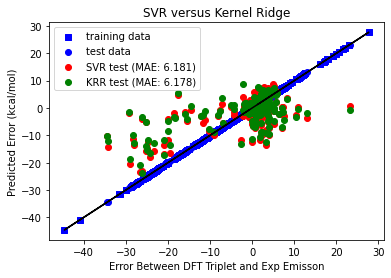

<Figure size 432x288 with 0 Axes>

In [89]:
# #############################################################################
# Look at the results
plt.plot(y, y, c='k')
plt.scatter(y_train, y_train, c='b', marker='s',label='training data')
plt.scatter(y_test, y_test, c='b', marker='o',label='test data')
plt.scatter(y_test, y_svr, c='r',
         label='SVR test (MAE: %.3f)' % (kr_mae_1))
plt.scatter(y_test, y_kr, c='g',
         label='KRR test (MAE: %.3f)' % (svr_mae_1))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

plt.show()

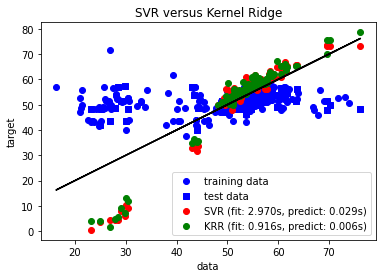

<Figure size 432x288 with 0 Axes>

In [61]:
# #############################################################################
# Look at the results
plt.plot(df_sum['Emax'], df_sum['Emax'], c='k')
plt.plot(df_sum['E_T'], df_sum['E_T'], c='k')
plt.scatter(df_train['E_T'], df_train['Emax'], c='b', marker='o',label='training data')
plt.scatter(df_test['E_T'], df_test['Emax'], c='b', marker='s',label='test data')
plt.scatter(df_test['E_T'], df_test['E_T']+y_svr, c='r',
         label='SVR test')
plt.scatter(df_test['E_T'], df_test['E_T']+y_kr, c='g',
         label='KRR test(fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

plt.show()